# Библиотеки

In [43]:
from scipy.stats import *
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
init_printing(use_latex=True)

# 1
Для нормальной случайной величины $X$ c математическим ожиданием
$\mathbb E(X) = 0,7$ и дисперсией $Var(X) = 49$ найдите вероятность $\mathbb P(|X| > 4,9)$.

## Аналитика

$$\mathbb P(\alpha < X < \beta) = \Phi(\frac{\beta - \mu}{\sigma}) - \Phi(\frac{\alpha - \mu}{\sigma}), \Phi(x) = \frac{1}{\sqrt{2 \pi}} \int_{0}^{x} e^{-\frac{z^2}{2}} \, dz$$

$X \sim N(\mu, \sigma^2); \mu = 0,7; \sigma^2 = 49 \Rightarrow \sigma = 7 \\
X \sim N(0,7; 7) \\
\mathbb P(|X| > 4,9) = \mathbb P(X > 4,9) + \mathbb P(X < -4,9) = \Phi(+\infty) - \Phi(\frac{4,9 - 0,7}{7}) + \Phi(\frac{-4,9 - 0,7}{7}) - \Phi(-\infty) = 0,5 - \Phi(0,6) - \Phi(0,8) + 0,5 \approx 1 - 0,2258 - 0,2881 = 0,4861$

In [17]:
1 - 0.2258 - 0.2881

## Кодом

In [14]:
X = norm(loc=0.7, scale=7)

In [15]:
X.sf(4.9) + X.cdf(-4.9)

# 2

Математические ожидания и дисперсии независимых нормальных случайных величин $X, Y, Z, U$ равны $1$.  
Найдите $\mathbb P(1 < 2X − 3Y + 5Z − U < 3)$.

## Аналитика

$X, Y, Z, U \sim N(1, 1)$. Зададим новое распределение $\Kappa = 2X - 3Y + 5Z - U:$  
$\mathbb E(\Kappa) = 2 \mathbb E(X) - 3 \mathbb E(Y) + 5 \mathbb E(Z) - \mathbb E(U) = 2 - 3 + 5 - 1 = 3$ Тк распределения независимы:  
$Var(\Kappa) = Var(2X − 3Y + 5Z − U) = 4 Var(X) + 9 Var(Y) + 25 Var(Z) + Var(U) = 3 + 9 + 25 + 1 = 38$  
Тк нормальное распределение устойчивое: $\Kappa \sim N(3, 38)$  
$\mathbb P(1 < \Kappa < 3) = \Phi(\frac{3 - 3}{\sqrt{38}}) - \Phi(\frac{1 - 3}{\sqrt{38}}) = 0 + \Phi(\frac{2}{\sqrt{38}}) \approx  0,627 - 0,5 = 0,127$

## Кодом

In [19]:
X, Y, Z, U = [norm(loc=1, scale=1) for _ in range(4)]

In [20]:
N = 100_000
K_sample = 2 * X.rvs(size=N) - 3 * Y.rvs(size=N) + 5 * Z.rvs(size=N) - U.rvs(size=N)

In [21]:
K_sample[(1 < K_sample) & (K_sample < 3)].size / N

# 3

Для независимых нормальных случайных величин $X, Y$ известны их математические ожидания и дисперсии: $\mathbb E(X) = 15; \mathbb E(Y) = 19,9; Var(X) = 5;Var(Y) = 44$. Найдите $\mathbb P(3X<2Y)$.

## Аналитика

## Кодом

In [22]:
X = norm(loc=15, scale=5**0.5)
Y = norm(loc=19.9, scale=44*0.5)

In [23]:
X_sample = X.rvs(size=N)
Y_sample = Y.rvs(size=N)

X_sample = 3 * X_sample
Y_sample = 2 * Y_sample

In [24]:
X_sample[X_sample < Y_sample].size / N

# 4

Для нормальной случайной величины $X$ известно, что математическое
ожидание $\mathbb E(X) = 20,3$ и вероятность $\mathbb P(X < 41) = 0,98928$. Найдите дисперсию $Var(X)$.

## Аналитика

$X \sim N(20,3; \sigma^2)$  
$\mathbb P(X < 41) = 0,98928 \Rightarrow \Phi(\frac{41-20,3}{\sigma}) - \Phi(-\infty) = 0,98928 \Rightarrow \Phi(\frac{20,7}{\sigma}) = 0,48928 \Rightarrow \frac{20,7}{\sigma} = 2,3 \Rightarrow \sigma = \frac{20,7}{2,3} = 9$  
$Var(X) = 81$

# 5

Для нормальной случайной величины $X$ известно, что дисперсия
$Var(X) = 81$ и вероятность $\mathbb P(X < 54) = 0,61791$. Найдите математическое
ожидание $\mu = \mathbb E(X)$.

## Аналитика

$X \sim N(\mu; 9)$  

$\mathbb P(X < 54) = 0,61791 \Rightarrow \Phi(\frac{54 - \mu}{9}) - \Phi(-\infty) = 0,61791 \Rightarrow \Phi(\frac{54 - \mu}{9}) = 0,11791 \Rightarrow \frac{54 - \mu}{9} = 0,3 \Rightarrow \mu = 51,3$  
$\mathbb E(X) = 51,3$

# 6

Случайная величина $X$ распределена по нормальному закону с математическим ожиданием $µ = 25$. Вероятность попадания $X$ в интервал $(10; 15)$
равна $0,2$. Найдите вероятность попадания $X$ в интервал $(35; 40)$?

## Аналитика

$X \sim N(25, \sigma^2)$

$\mathbb P(X \in (10;15)) = 0,2 \Rightarrow \Phi(\frac{15 - 25}{\sigma}) - \Phi(\frac{10-25}{\sigma}) = 0,2 \Rightarrow -\Phi(\frac{10}{\sigma}) + \Phi(\frac{15}{\sigma}) = 0,2 \Rightarrow \Phi(\frac{40-25}{\sigma}) - \Phi(\frac{35-25}{\sigma}) = 0,2 \Rightarrow  \\ 
\mathbb P(X \in (35; 40)) = 0,2$

# 12

Для независимых случайных величин $X_1, X_2, \ldots$ равномерно распределенных на отрезке $[1, 13]$, найдите предел

$$\lim_{n \rightarrow \infty} \mathbb P(X_1 + \ldots X_n > 7n - \sqrt{n})$$

## Аналитика

$\lim_{n \rightarrow \infty} \mathbb P(\frac{S_n - n \mu}{\sigma \sqrt{n}} \leqslant x) = \Phi(x)$

$\mathbb E(X) = \frac{b+a}{2} = \frac{13+1}{2} = 7, Var(x) = \frac{(b-a)^2}{12} = \frac{(13-1)^2}{12} = 12, \sigma = \sqrt{12}$

$\lim_{n \rightarrow \infty} \mathbb P(\frac{X_1 + \ldots X_n - 7n}{\sqrt{12n}} > -\frac{1}{\sqrt{12}}) = 1 - \lim_{n \rightarrow \infty} \mathbb P(\frac{X_1 + \ldots X_n - 7n}{\sqrt{12n}} \leqslant -\frac{1}{\sqrt{12}}) = 1 - \Phi(+\infty) + \Phi(\frac{-1-7}{\sqrt{12}}) = 1 - \Phi_0(\frac{1}{\sqrt{12}}) \approx 0.3864149$

In [143]:
1 - norm.cdf(1/12 ** 0.5)

## Кодом

In [138]:
n = 100_000
N = 10_000

X = uniform(loc=1, scale=12)
exp = [X.rvs(size=n).sum() < 7 * n - n ** 0.5  for _ in range(N)]

In [139]:
np.array(exp).mean()

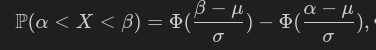

# 13

Для независимых равномерно распределенных на отрезке $[−2; 2]$ случайных величин $X_1, X_2, \ldots$ найдите предел 
$$\lim_{n \rightarrow \infty} \mathbb P(|X_1 + X_2 + \ldots + X_n| < \sqrt{3n}) $$

$\lim_{n \rightarrow \infty} \mathbb P(\frac{S_n - n \mu}{\sigma \sqrt{n}} \leqslant x) = \Phi(x)$

$\mathbb E(X_i) = 0, Var(X_i) = \frac{(2+2)^2}{12} = \frac{4}{3}, \sigma = \frac{2\sqrt{3}}{3}$

$\lim_{n \rightarrow \infty} \mathbb P(- \sqrt{3} < \frac{X_1 + \ldots X_n}{\sqrt{n}} < \sqrt{3}) = \lim_{n \rightarrow \infty} \mathbb P(- \frac{3}{2} < \frac{X_1 + \ldots X_n}{\frac{2\sqrt{3}}{3} \cdot \sqrt{n}} < \frac{3}{2}) = 2 \Phi_0(\frac{3}{2}) \approx 0.8664$

In [144]:
2 * norm.cdf(3/2) - 1 

## Кодом

In [127]:
n = 100_000
N = 10_000

X = uniform(loc=-2, scale=4)
exp = [abs(X.rvs(size=n).sum()) < (3 * n) ** 0.5  for _ in range(N)]

In [128]:
np.array(exp).mean()

# 14

Пусть случайная величина $X$ имеет _треугольное распределение_ _(Triangular
distribution)_ на отрезке $[a, b] (a < b)$ с параметром $c$, где $a \leqslant c \leqslant b$,
$(X \sim Tri([a; b]; c))$.


a. Покажите, что $\mathbb E(X) = \frac{a+b+c}{3}, Var(X) = \frac{a^2+b^2+c^2-ab-ac-bc}{18}$.

б. Постройте график плотности для $X \sim Tri([−1; 3]; c = -\frac{2}{3})$.
Можно использовать $X=triang(c−a
b−a , a, b − a)$ из библиотеки
from scipy.stats import triang.

в. Пусть $X_1, X_2, \ldots $ бесконечная последовательность одинаково распределенных случайных величин, имеющих треугольное распределение на отрезке $[−1; 3]$ с параметром $c = -\frac{2}{3}, (X_k \sim Tri ([−1; 3]; c = -\frac{2}{3}))$. С помощью IPython продемонстрируйте ЗБЧ и ЦПТ для $S_n = \frac{S_n}{n}, S_n = X_1 + X_2 + \ldots + X_n$

## Аналитика

$
X \sim Tri([a; b]; c) \\
f(x) = \begin{cases}
\frac{2(x-a)}{(b-a)(c-a)}, & x \in [a; c); \\
\frac{2(b-x)}{(b-a)(b-c)}, & x \in [c; b]; \\
0, & x \not \in [a; b].
\end{cases}$

a. 
Тк $a, b, c \geqslant 0; a \leqslant c \leqslant b$  

$\mathbb E(x) = \int_{- \infty}^{+ \infty} x f(x) \, dx = \int_{- \infty}^{a} x f(x) \, dx + \int_{a}^{c} x f(x) \, dx + \int_{c}^{b} x f(x) \, dx + \int_{b}^{+ \infty} x f(x) \, dx = \\
\int_{a}^{c} x f(x) \, dx + \int_{c}^{b} x f(x) \, dx = \int_{a}^{c} x \frac{2(x-a)}{(b-a)(c-a)} \, dx + \int_{c}^{b} x \frac{2(b-x)}{(b-a)(b-c)} \, dx = \frac{a + b + c}{3}$

$Var(x) = \int_{-\infty}^{+ \infty} x^2 f(x) \, dx - \mathbb E^2(x) = \int_{- \infty}^{a} x^2 f(x) \, dx + \int_{a}^{c} x^2 f(x) \, dx + \int_{c}^{b} x^2 f(x) \, dx + \int_{b}^{+ \infty} x^2 f(x) \, dx  - \mathbb E^2(x) = \\
= \int_{a}^{c} x^2 f(x) \, dx + \int_{c}^{b} x^2 f(x) \, dx - \mathbb E^2(x) = \int_{a}^{c} x^2 \frac{2(x-a)}{(b-a)(c-a)} \, dx + \int_{c}^{b} x^2 \frac{2(b-x)}{(b-a)(b-c)} \, dx - \mathbb E^2(x) = \frac{a^2+b^2+c^2-ab-ac-bc}{18}$

## Кодом

In [5]:
x, a, b, c = symbols('x, a, b, c')

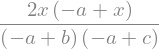

In [6]:
f1 = 2 * x * (x-a) / ((b-a) * (c-a))
f1

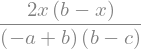

In [7]:
f2 = 2 * x * (b-x) / ((b-a) * (b-c))
f2

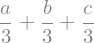

In [12]:
ex = simplify(integrate(f1, (x, a, c)) + integrate(f2, (x, c, b)))
ex

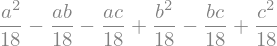

In [14]:
varx = simplify(integrate(x * f1, (x, a, c)) + integrate(x * f2, (x, c, b))  - ex ** 2)
varx

### График

In [112]:
x = np.linspace(-1, 3, 10_000)
y = []
a, b, c = -1, 3, -2/3

In [113]:
y.append(2 * (x[(a <= x) & (x < c)] - a) / ((b - a) * (c - a)))
y.append(2 * x[x == c])
y.append(2 * (b - x[(c < x) & (x <= b)]) / ((b - a) * (b - c)))

for i in range(3):
    y[i] = y[i].tolist()

In [114]:
y = sum(y, [])

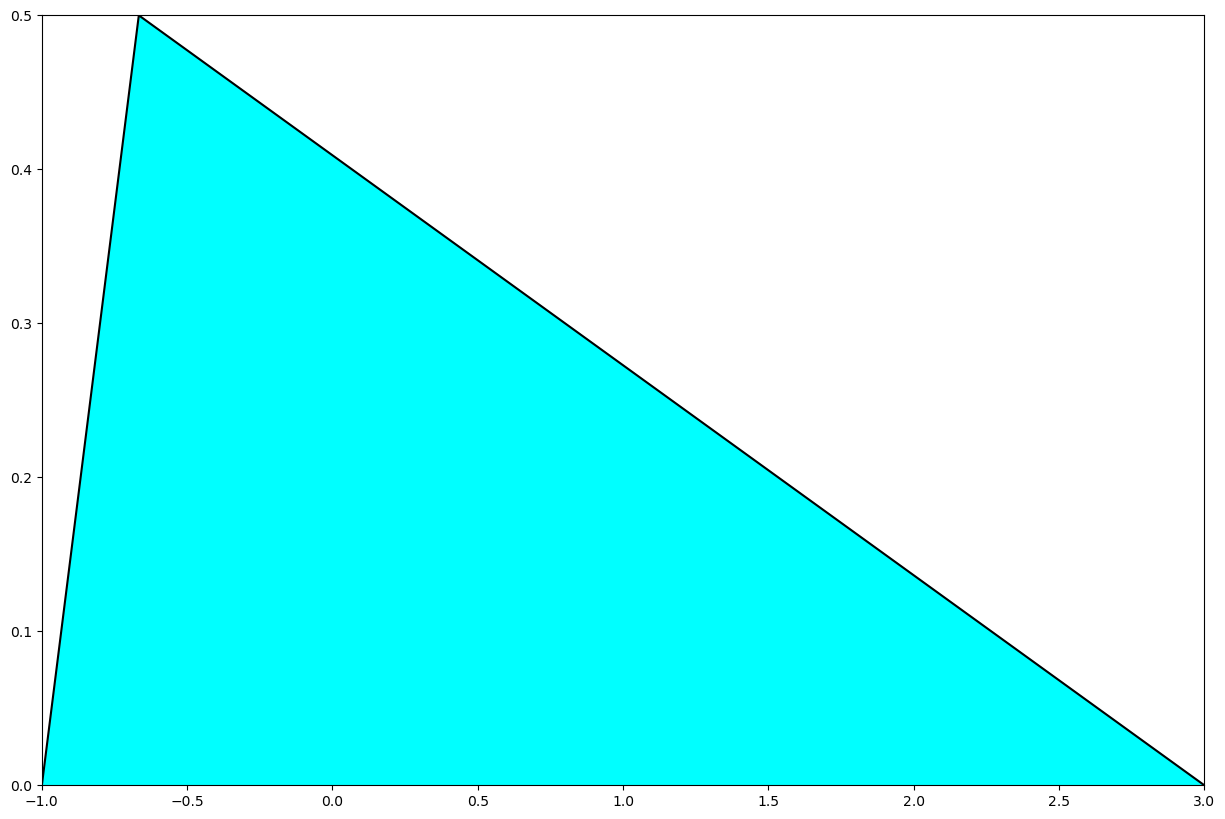

In [117]:
plt.figure(figsize=(15, 10))
plt.ylim(0, 0.5)
plt.xlim(-1, 3)

plt.plot(x, y, 'black')
plt.fill_between(x, y, color='cyan')

In [103]:
x = triang((c-a)/(b-a), a, b-a)
ex = (a+b+c)/3

In [107]:
N = 3_000

In [108]:
x_ax = np.arange(1, N+1)
y_ax = []

for n in range(1, N+1):
    x_sample = x.rvs(size=n)

    y_ax.append(x_sample.mean())

<Figure size 640x480 with 0 Axes>

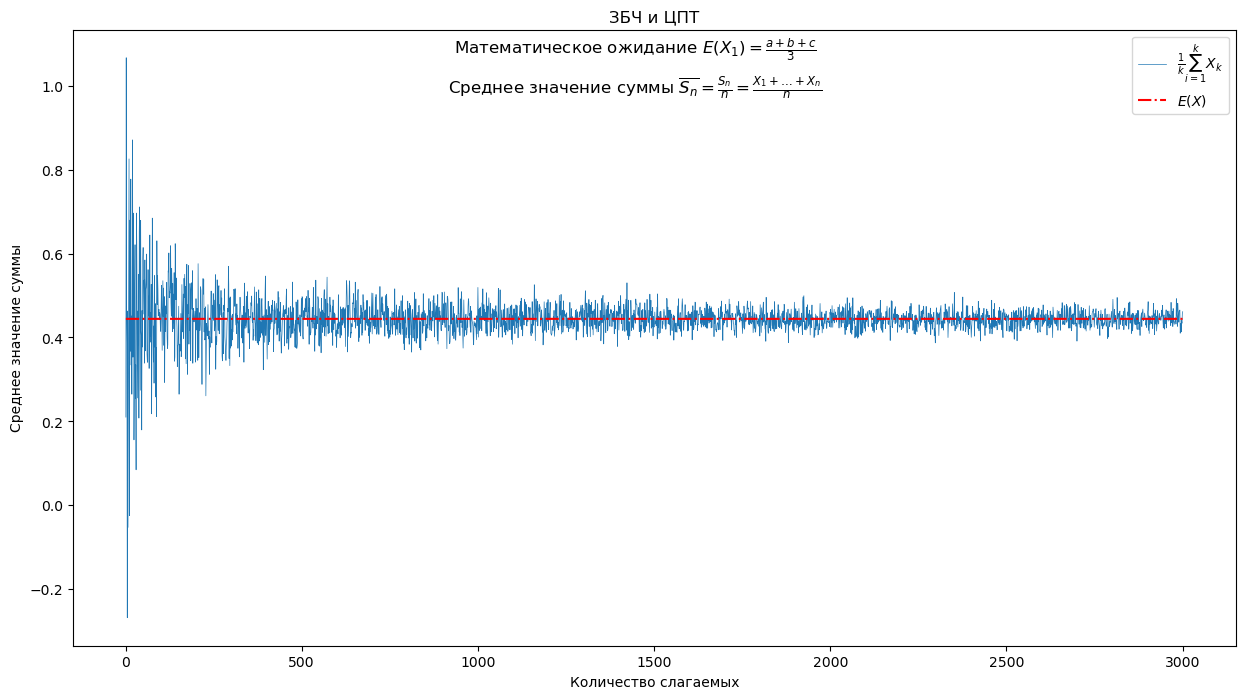

In [110]:
fig = plt.figure()
plt.figure(figsize=(15, 8))
plt.title("ЗБЧ и ЦПТ")
plt.xlabel("Количество слагаемых")
plt.ylabel("Среднее значение суммы")
plt.figtext(0.5, 0.85, r"Математическое ожидание $E(X_1) = \frac{a+b+c}{3}$", wrap=True, horizontalalignment='center', fontsize=12)
plt.figtext(0.5, 0.8, r"Среднее значение суммы $\overline{S_n} = \frac{S_n}{n} = \frac{X_1 + \ldots + X_n}{n}$", wrap=True, horizontalalignment='center', fontsize=12)
plt.plot(x_ax, y_ax, linewidth=0.5, label=r"$\frac{1}{k}\sum_{i=1}^k X_k$")
plt.plot(x_ax, [ex] * len(x_ax), 'r-.', label=r"$E(X)$")
plt.legend()